## Análise Estatística dos Resultados da Pesquisa
O tema: "O Impacto dos Exercícios Físicos na Qualidade do Sono"  
Vamos organizar essa análise em algumas **perguntas básicas** sobre o tema, que podemos responder com base nas respostas do formulário.

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
df = pd.read_csv("forms_responses_clear.csv")
df.head()

,timestamp,age,exercise_practice,exercise_freq,exercise_cardio,exercise_duration,exercise_period,sleep_duration,sleep_quality,sleep_affects,...,caminhada,ciclismo,corrida,esgrima,esportes coletivos,luta,natação,pilates,treino de força,yoga
0,28/04/2025 21:09:39,21,Não,1,Não,15,Manhã,7,3,"Sim, afeta para melhor",...,1,0,0,0,0,0,0,0,0,0
1,28/04/2025 21:16:31,22,Sim,4,Sim,90,Tarde,6,2,"Sim, afeta para melhor",...,1,0,1,0,0,0,0,1,1,1
2,28/04/2025 21:16:32,23,Não,0,Não,10,Manhã,9,3,"Não, não afeta",...,1,0,0,0,0,0,0,0,0,0
3,28/04/2025 21:18:08,21,Sim,4,Sim,120,Noite,6,4,"Sim, afeta para melhor",...,0,0,0,0,0,0,0,0,1,0
4,28/04/2025 21:18:13,21,Não,0,Não,0,Tarde,6,3,"Não, não afeta",...,1,0,0,0,0,0,0,0,0,0


In [116]:
df.columns

Index(['timestamp', 'age', 'exercise_practice', 'exercise_freq',
       'exercise_cardio', 'exercise_duration', 'exercise_period',
       'sleep_duration', 'sleep_quality', 'sleep_affects', 'opinion',
       'recent_exercise_frequency', 'recent_sleep_quality',
       'recent_ext_factors', 'ansiolíticos', 'antidepressivos',
       'antidepressivos ', 'estimulantes ', 'indutores de sono ', 'nenhum',
       'outro ', 'caminhada', 'ciclismo ', 'corrida', 'esgrima',
       'esportes coletivos ', 'luta', 'natação', 'pilates', 'treino de força ',
       'yoga'],
      dtype='object')

### Distribuição dos dados: quem faz exercício vs quem não faz

In [117]:
df_yes = df[df["exercise_practice"] == "Sim"][["sleep_quality", "sleep_duration"]]
df_yes.describe()


,sleep_quality,sleep_duration
count,28.000000,28.000000
mean,3.500000,6.857143
std,0.922958,1.238706
min,1.000000,4.000000
25%,3.000000,6.000000
50%,4.000000,7.000000
75%,4.000000,8.000000
max,5.000000,9.000000


In [118]:
df_no = df[df["exercise_practice"] == "Não"][["sleep_quality", "sleep_duration"]]
df_no.describe()

,sleep_quality,sleep_duration
count,9.000000,9.000000
mean,3.333333,6.555556
std,1.118034,1.130388
min,2.000000,5.000000
25%,3.000000,6.000000
50%,3.000000,6.000000
75%,4.000000,7.000000
max,5.000000,9.000000


/tmp/ipykernel_64180/913667500.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=['Pratica Exercício', 'Não Pratica Exercício'])


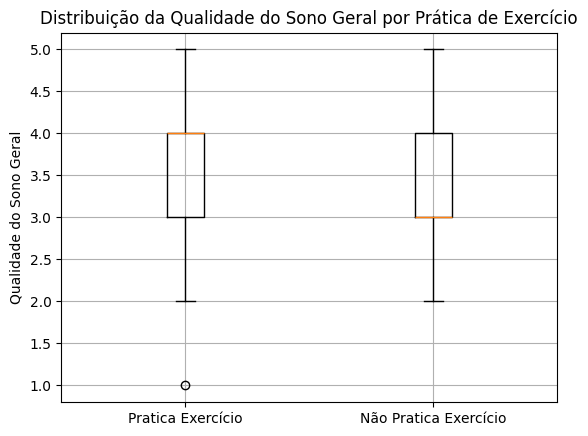

In [119]:
fig, ax = plt.subplots()

# Dados para o boxplot
data = [
    df_yes['sleep_quality'],
    df_no['sleep_quality']
]

ax.boxplot(data, labels=['Pratica Exercício', 'Não Pratica Exercício'])
ax.set_title('Distribuição da Qualidade do Sono Geral por Prática de Exercício')
ax.set_ylabel('Qualidade do Sono Geral')

plt.grid()
plt.show()

/tmp/ipykernel_64180/1286623430.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=['Pratica Exercício', 'Não Pratica Exercício'])


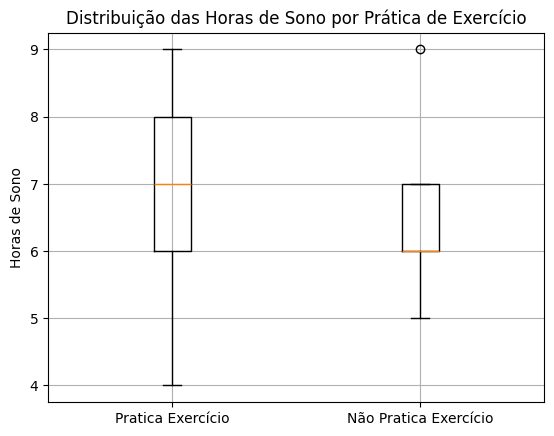

In [120]:
fig, ax = plt.subplots()

# Dados para o boxplot
data = [
    df_yes['sleep_duration'],
    df_no['sleep_duration']
]

ax.boxplot(data, labels=['Pratica Exercício', 'Não Pratica Exercício'])
ax.set_title('Distribuição das Horas de Sono por Prática de Exercício')
ax.set_ylabel('Horas de Sono')

plt.grid()
plt.show()

### Quem faz exercício físico tem uma média de qualidade de sono maior?

In [121]:
df_exercisexquality = df.groupby('exercise_practice')[["sleep_quality", "sleep_duration", "recent_sleep_quality"]].agg(['mean'])
df_exercisexquality

,sleep_quality,sleep_duration,recent_sleep_quality
,mean,mean,mean
exercise_practice,,,
Não,3.333333,6.555556,3.111111
Sim,3.500000,6.857143,3.321429


In [122]:
avg_sleep_yes = df_exercisexquality.loc["Sim", ("sleep_quality", "mean")]
avg_sleep_no = df_exercisexquality.loc["Não", ("sleep_quality", "mean")]
avg_rsleep_yes = df_exercisexquality.loc["Sim", ("recent_sleep_quality", "mean")]
avg_rsleep_no = df_exercisexquality.loc["Não", ("recent_sleep_quality", "mean")]

In [123]:
# comparação da média do sono no geral

dif = avg_sleep_yes - avg_sleep_no
p = (dif/avg_sleep_yes) * 100

print(f"Média de qualidade de sono de quem faz exercício: {avg_sleep_yes}")
print(f"Média de qualidade de sono de quem NÃO faz exercício: {avg_sleep_no}")
print(f"Diferença de {dif.round(2)} pontos ({p.round(2)}%)")

Média de qualidade de sono de quem faz exercício: 3.5
Média de qualidade de sono de quem NÃO faz exercício: 3.3333333333333335
Diferença de 0.17 pontos (4.76%)


In [124]:
# comparação da média do sono recentemente

dif = avg_rsleep_yes - avg_rsleep_no
p = (dif/avg_rsleep_yes) * 100

print(f"Média de qualidade de sono de quem faz exercício: {avg_rsleep_yes}")
print(f"Média de qualidade de sono de quem NÃO faz exercício: {avg_rsleep_no}")
print(f"Diferença de {dif.round(2)} pontos ({p.round(2)}%)")


Média de qualidade de sono de quem faz exercício: 3.3214285714285716
Média de qualidade de sono de quem NÃO faz exercício: 3.111111111111111
Diferença de 0.21 pontos (6.33%)


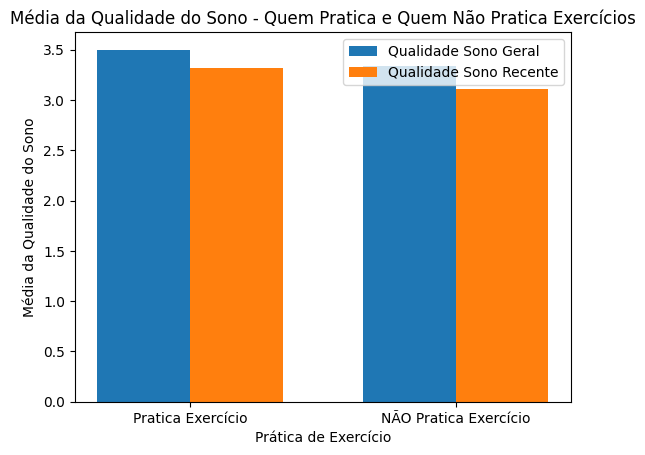

In [125]:
# plotar o gráfico
cat = ["Pratica Exercício", "NÃO Pratica Exercício"]
sleep_avg = [avg_sleep_yes, avg_sleep_no]
rsleep_avg = [avg_rsleep_yes, avg_rsleep_no]
bar_l = 0.35
x = range(len(cat))

fig, ax = plt.subplots()

# Barras
ax.bar(x, sleep_avg, width=bar_l, label='Qualidade Sono Geral')
ax.bar([p + bar_l for p in x], rsleep_avg, width=bar_l, label='Qualidade Sono Recente')

# Eixos e título
ax.set_xlabel('Prática de Exercício')
ax.set_ylabel('Média da Qualidade do Sono')
ax.set_title('Média da Qualidade do Sono - Quem Pratica e Quem Não Pratica Exercícios')
ax.set_xticks([p + bar_l / 2 for p in x])
ax.set_xticklabels(cat)

# Legenda
ax.legend()

plt.show()

**Nota: a qualidade do sono recente foi avaliada subjetivamente pelos participantes da pesquisa, porém, foi respondido também se algum fator externo prejudicou ou melhorou o sono recente.**

In [126]:
t = df["recent_ext_factors"].notnull().sum()

worse = (df["recent_ext_factors"] == "melhorou").sum()
better = (df["recent_ext_factors"] == "piorou").sum()

percent_worse = worse / t * 100
percent_better = better / t * 100

print(f"{percent_worse.round(2)}% das pessoas alegam que fatores externos pioraram o seu sono dos últimos 7 dias")
print(f"{percent_better.round(2)}% das pessoas alegam que fatores externos melhoraram o seu sono dos últimos 7 dias")

5.41% das pessoas alegam que fatores externos pioraram o seu sono dos últimos 7 dias
59.46% das pessoas alegam que fatores externos melhoraram o seu sono dos últimos 7 dias


### Há relação entre a regularidade dos exercícios com a qualidade ou duração do sono?

Por exemplo: quem faz exercícios mais vezes na semana classifica seu sono como melhor?

In [127]:
df_regularxsleep = df.groupby('exercise_freq')[['sleep_quality', 'sleep_duration']].mean()
df_regularxsleep


,sleep_quality,sleep_duration
exercise_freq,,
0,3.600000,7.000000
1,3.333333,6.333333
2,2.500000,6.500000
3,3.400000,6.700000
4,3.500000,6.500000
5,3.888889,7.222222


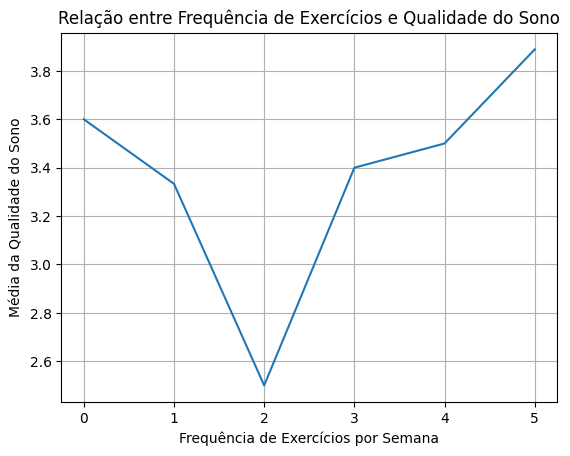

In [128]:
fix, ax = plt.subplots()
ax.plot(df_regularxsleep.index.tolist(), df_regularxsleep["sleep_quality"].values)
ax.set_title("Relação entre Frequência de Exercícios e Qualidade do Sono")
ax.set_xlabel("Frequência de Exercícios por Semana")
ax.set_ylabel("Média da Qualidade do Sono")
ax.set_xticks(df_regularxsleep.index.tolist())

plt.grid(True)
plt.show()

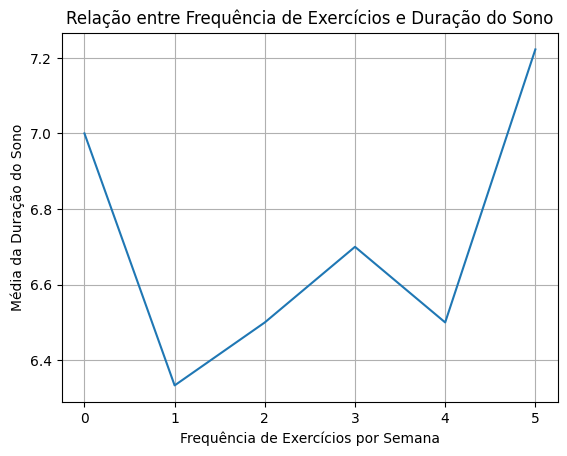

In [129]:
fix, ax = plt.subplots()
ax.plot(df_regularxsleep.index.tolist(), df_regularxsleep["sleep_duration"].values)
ax.set_title("Relação entre Frequência de Exercícios e Duração do Sono")
ax.set_xlabel("Frequência de Exercícios por Semana")
ax.set_ylabel("Média da Duração do Sono")
ax.set_xticks(df_regularxsleep.index.tolist())

plt.grid(True)
plt.show()

In [130]:
df_regularxrsleep = df.groupby('recent_exercise_frequency')[['recent_sleep_quality']].mean()
df_regularxrsleep


,recent_sleep_quality
recent_exercise_frequency,
0,3.333333
1,3.000000
2,3.285714
3,3.400000
4,3.166667
5,3.375000


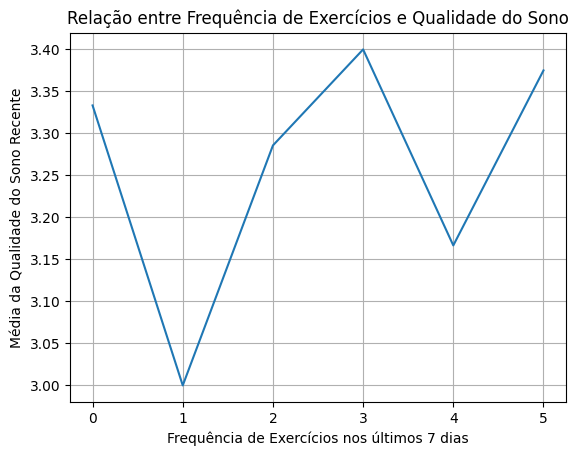

In [131]:
fix, ax = plt.subplots()
ax.plot(df_regularxrsleep.index.tolist(), df_regularxrsleep["recent_sleep_quality"].values)
ax.set_title("Relação entre Frequência de Exercícios e Qualidade do Sono")
ax.set_xlabel("Frequência de Exercícios nos últimos 7 dias")
ax.set_ylabel("Média da Qualidade do Sono Recente")
ax.set_xticks(df_regularxrsleep.index.tolist())

plt.grid(True)
plt.show()

### Quem faz múltiplos exercícios tem a qualidade de sono superior?

In [132]:
df["exercise_types_count"] = df[['caminhada', 'ciclismo ', 'corrida', 'esgrima',
       'esportes coletivos ', 'luta', 'natação', 'pilates', 'treino de força ',
       'yoga']].sum(axis=1)
df_countxsleep = df.groupby("exercise_types_count")[["sleep_quality", "sleep_duration"]].mean()
df_countxsleep

,sleep_quality,sleep_duration
exercise_types_count,,
1,3.500000,7.062500
2,3.375000,6.250000
3,3.444444,6.888889
4,3.500000,6.500000
5,3.500000,6.500000


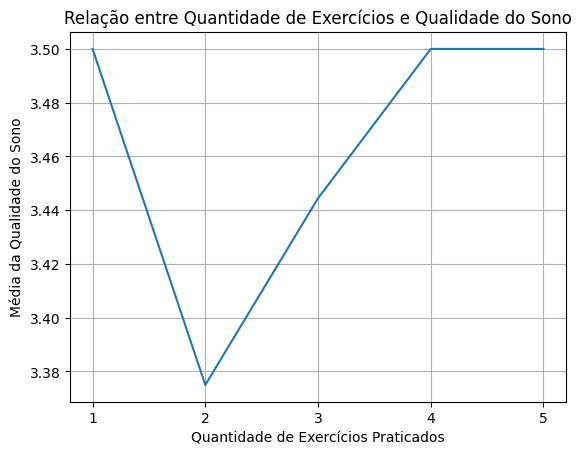

In [133]:
fix, ax = plt.subplots()
ax.plot(df_countxsleep.index.tolist(), df_countxsleep["sleep_quality"].values)
ax.set_title("Relação entre Quantidade de Exercícios e Qualidade do Sono")
ax.set_xlabel("Quantidade de Exercícios Praticados")
ax.set_ylabel("Média da Qualidade do Sono")
ax.set_xticks(df_countxsleep.index.tolist())

plt.grid(True)
plt.show()

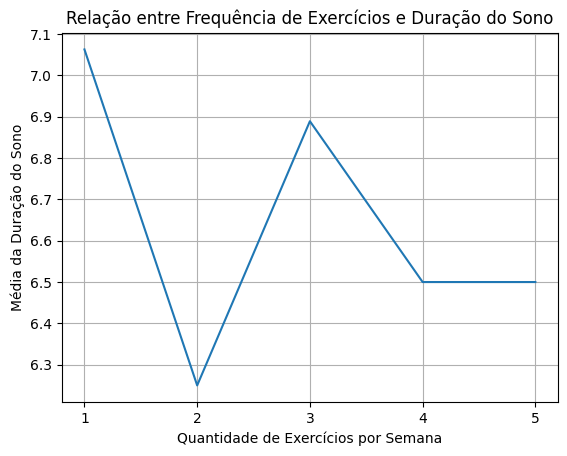

In [134]:
fix, ax = plt.subplots()
ax.plot(df_countxsleep.index.tolist(), df_countxsleep["sleep_duration"].values)
ax.set_title("Relação entre Frequência de Exercícios e Duração do Sono")
ax.set_xlabel("Quantidade de Exercícios por Semana")
ax.set_ylabel("Média da Duração do Sono")
ax.set_xticks(df_countxsleep.index.tolist())

plt.grid(True)
plt.show()